# Gaussian noise removal parameter estimation
__Author__ : Mohammad Rouintan , 400222042

__Course__ : Undergraduate Digital Image Processing Course

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [7]:
def add_gaussian_noise(image, sigma=0.1):
    mean = 0.0
    gauss = np.random.normal(mean, sigma, image.shape)
    noisy = image + gauss
    return noisy

In [14]:
def gaussian_filter(image, filter_size, sigma=0):
    return cv2.GaussianBlur(image, (filter_size, filter_size), sigma)

In [28]:
def calculate_MSE(image, filtered_image):
    M = image.shape[0]
    N = image.shape[1]

    mse = 0
    for i in range(M):
        for j in range(N):
            mse += (image[i, j] - filtered_image[i, j]) ** 2

    mse /= (M * N)
    return mse

In [29]:
def calculate_PSNR(image, filtered_image):
    psnr = 10 * np.log10((255**2) / calculate_MSE(image, filtered_image))
    return psnr

In [37]:
def add_noise_process(image):
    image = (image - np.min(image)) / (np.max(image) - np.min(image))

    noisy_1 = add_gaussian_noise(image, sigma=0.1)
    noisy_2 = add_gaussian_noise(image, sigma=0.2)
    noisy_3 = add_gaussian_noise(image, sigma=0.3)
    noisy_4 = add_gaussian_noise(image, sigma=0.4)

    plt.figure(figsize=(10, 10))
    plt.subplot(321), plt.imshow(image, cmap='gray'), plt.title('Original')
    plt.subplot(322), plt.imshow(noisy_1, cmap='gray'), plt.title('noise with sigma = 0.1')
    plt.subplot(323), plt.imshow(noisy_2, cmap='gray'), plt.title('noise with sigma = 0.2')
    plt.subplot(324), plt.imshow(noisy_3, cmap='gray'), plt.title('noise with sigma = 0.3')
    plt.subplot(325), plt.imshow(noisy_4, cmap='gray'), plt.title('noise with sigma = 0.4')
    plt.show()
    
    return noisy_1, noisy_2, noisy_3, noisy_4

In [41]:
def filtering_process(image):
    filtered_1 = gaussian_filter(image, 3, sigma=1)
    filtered_2 = gaussian_filter(image, 3, sigma=5)
    filtered_3 = gaussian_filter(image, 5, sigma=1)
    filtered_4 = gaussian_filter(image, 5, sigma=5)

    plt.figure(figsize=(10, 10))
    plt.subplot(221), plt.imshow(filtered_1, cmap='gray'), plt.title('gaussian filter with size = 3 and sigma = 1')
    plt.subplot(222), plt.imshow(filtered_2, cmap='gray'), plt.title('gaussian filter with size = 3 and sigma = 5')
    plt.subplot(223), plt.imshow(filtered_3, cmap='gray'), plt.title('gaussian filter with size = 5 and sigma = 1')
    plt.subplot(224), plt.imshow(filtered_4, cmap='gray'), plt.title('gaussian filter with size = 5 and sigma = 5')
    plt.show()

    return filtered_1, filtered_2, filtered_3, filtered_4

#### Lena

In [38]:
image = cv2.imread('Images/lena.tif', 0)

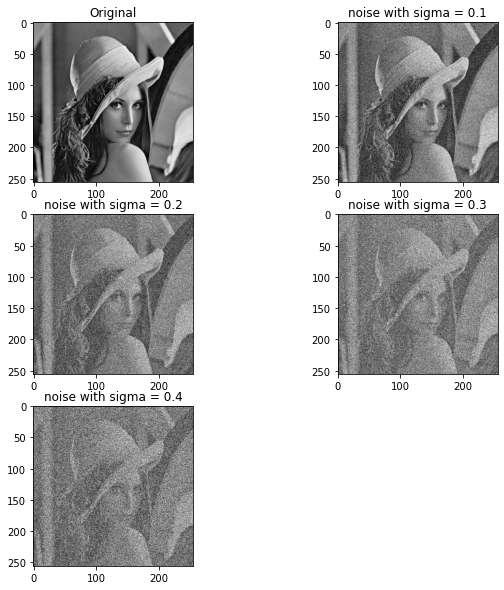

In [39]:
# Add noise to lena image
noisy_1, noisy_2, noisy_3, noisy_4 = add_noise_process(image)

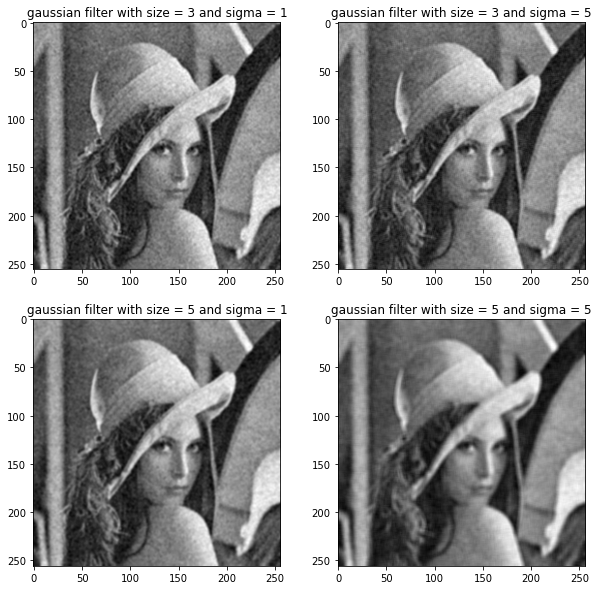

In [42]:
# Gaussian filter on noisy image with sigma = 0.1
filtered_1, filtered_2, filtered_3, filtered_4 = filtering_process(noisy_1)

In [46]:
mse1 = calculate_MSE(image, filtered_1)
mse2 = calculate_MSE(image, filtered_2)
mse3 = calculate_MSE(image, filtered_3)
mse4 = calculate_MSE(image, filtered_4)

print(mse1, mse2, mse3, mse4)

12369.696543761214 12369.876750811853 12370.059572545844 12370.974893291945
